### Scribers
    Sushil Shrestha
    Koo Daniel
    Nunogawa Brent
    Kuloloia Anthony

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats

import itertools

%matplotlib inline

### Logistic regression with more than two classes

As discussed previously, logistic regression is used to predict the probability of an outcome, and is especially popular for classification tasks.  For example, we could utilize a Voted dataset where the possible values are "yes" and "no".  The algorithm predicts the probability of occurrence of an event by fitting the data to a logistic function.  However, what if we are faced with more than two categories?  For example, you are examining a dataset of document topics that contains the following values: sports, politics, business, entertainment, etc.  We can utilize the equation

$$
P(Y=k |X) = \frac{e^{\beta_{0,k} + \beta_{1,k}X1 + \ldots + \beta_{p,k}Xp}}{\sum_{i=1}^{k} e^{\beta_{0,i} + \beta_{1,i}X1 + \ldots + \beta_{p,i}Xp}}
$$

for the aforementioned multinomial regression.  However, it is important to note the class with which $P(Y=k |X)$ is selected, must be the highest.

### Linear Discriminant Analysis

Although logistic regression has been our main source for classification, it does present some flaws.  That is, when classes are well separated, parameters estimated from logistic regression tend to be unstable.  In addition, when the data set is small, logistic regression is also usntable. Despite mentioning the fact that it can apply to more than two classes, it isn't the best method to derive predictions from.  This is where Linear Discriminat Analysis (LDA) comes in to play.  It presumes independent variables are modeled according to Gaussians and then utilizes Baye's theorem to estimate the probability.  

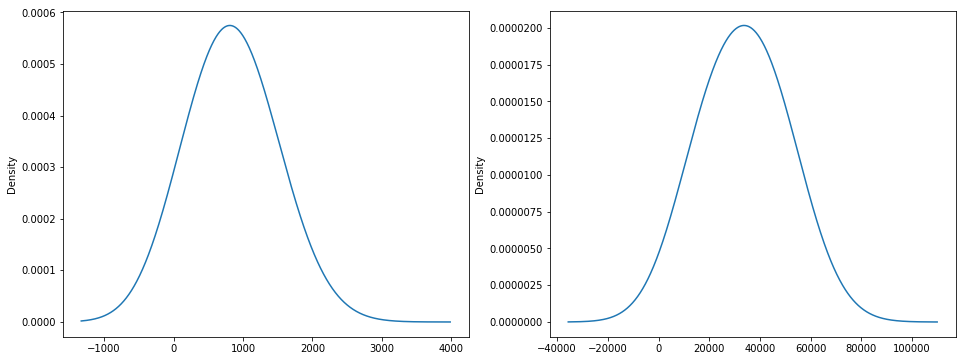

In [2]:
plt.figure(figsize=(16,6))
data = pd.read_excel("data/Default.xlsx")
plt.subplot(1,2,1)
data["balance"].plot.density(bw_method=1)
plt.subplot(1,2,2)
data["income"].plot.density(bw_method=1)

### Linear Discriminant Analysis- Single Param ($~~p = 1~~$)

For Linear Discriminant Analysis, we assume that the params can be modeled using Gaussians. For each response classes, Linear Discriminant Analysis models the distribution of predictors separately, and then it uses Bayes’ theorem to estimate the probability.

We will start with modeling using single parameter. Using a single parameter LDA on our Credit card dataset, we can figure out how `balance` predicts `default`.

The single parameter model can be extrapolated to include more parameters.



#### Bayes Theorem for classification
From Bayes theroem, we can find the probability of input $X$ being in class $Y=k$ by the formula:

$$
p(Y=k~~|~~X) = \frac{p(Y=k) \cdot p(X=x~~|~~ Y= k)  }{p(X=x)}
$$

$p(Y=k~~|~~X)$:  The posterior, and can be read as "The Probability of k occuring given that X is true.  Such as what is the probabilty that a patient has Ebola, given that he has x symptoms.

$p(X=x~~|~~ Y= k)$:  The "likelyhood" or "class model", and can be read as "The probability of x occuring given that k is true".  Such as, what is the probability that the patient has x symptoms because he does in fact have Ebola.

$k$: Proposition, Such as Yes the patient has Ebola or No the patient does not.

$x$: Evidence, Such as A set of symptoms like, high fever, muscle ache, vomiting.

$p(Y=k)$ The "prior probability of proposition" or "Prior", and can be read as "The probability of k occuring".  Such as the doctor not even looking at the patient and asking is the patient likely to have Ebola given that they live in the United States.  He might have something else despite having the symptoms of Ebola.

$p(X=x)$  The "prior probability of evidence" or "Normalizer"  This can be left out, and can be read as "The probability of x occuring".  Such as regardless of whether the patient has Ebola, what is the probability of him vomiting, having a high fever, weakness, etc.  Or even what is the probability of him having a symptom unrelated to Ebola.  It is necessary if you want to do something such as ranking the patients who have Ebola.  Like is Patient 1 more likely to have Ebola than patient 2.

We can rewrite the above formula for classification as:

\begin{align*}
  p(Y=k~~|~~X) =& \frac{\pi_k \cdot p_k(x)}{p(x)} \\
  \text{where, } & \text{$\pi_k$ is the prior probability for class $k$} \\
  &\text{$p_k(x) = Pr(X = x~~|~~Y = k)$ is the density for the independent variable $X$ in class $k$.} \\
  &\text{$p(x)$ is the density for X under all classes. This can be written as: $\sum_{i=1}{K} \pi_i \cdot p_i(x)$} \\
  p(Y=k~~|~~X) =& \frac{\pi_k \cdot p_k(x)}{\sum_{i=1}^{K} \pi_i \cdot p_i(x)} \\
\end{align*}

  
Using this formula, we can find the probability of input X being on class 1 to k and assign a class for input X with the highest probability. In other words, we are simply assigning the point to the distribution, it is most likely to have originated from.

To be able to classify the point using Bayes theorem, we need `pdf`( $p_k(x)$ ) and prior of the class ($\pi_k$).

### The Role of the Prior
#### When classes are equally likely
To know about the role of prior, consider we have two normal distributed data with variance $\sigma = 1$ but two different means ( $\mu_A = 20$ and $\mu_B = 23$). Since we have equal variance $\sigma$, we can say that probability of both classes are equal i.e. ($\pi_A == \pi_B$) (both classes are equally likely). Lets quickly plot a graph for the distributions.

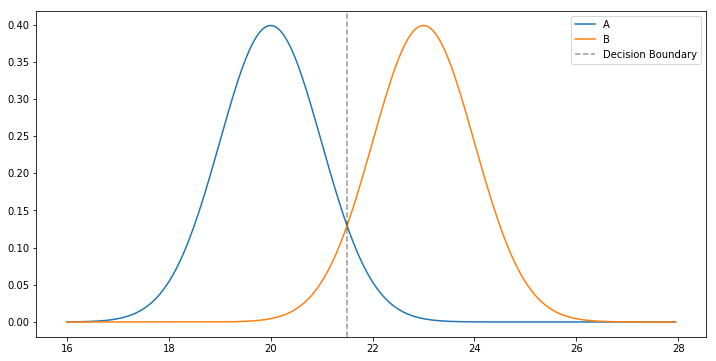

In [3]:
plt.figure(figsize=(12,6))
x_axis = np.arange(16, 28, 0.05) 

plt.plot(x_axis, stats.norm.pdf(x_axis, 20, 1 ), label = "A")
plt.plot(x_axis, stats.norm.pdf(x_axis, 23, 1 ), label="B")
plt.axvline(21.5, linestyle='--', color='k', alpha = 0.4, label="Decision Boundary")
plt.legend()

Now given a point how can we classify the point to be either in class A or in class B? One way to do this would be to find out the decision boundary for our classifier in terms of dependent variable (x-axis). We can find the decision boundary as: 

$$
db = \frac{\mu_A + \mu_B}{2}
$$
*In above graph, decision boundary is denoted by dotted line.*

Now using that decision bounday, we can classify point and assign the point to one of two class (A or B) using following guideline.
* If the point $x_i$ lies on the left side of the decision boundary assign class label A (ie. $x_i < db$ then $x_i$ belongs to class A)
* If the point $x_i$ lies on the right side of the decision boundary assign class label B (ie. $x_i > db$ then $x_i$ belongs to class B)

#### When one class is more likely than other 
Above we assumed that both classes are equally likely to occur but if we know before hand that a class, say 'A' is more likely than another (ex. 'B'), then we can include that prior information in the likelihood calculation. The prior can be used to update the `pdf` based on our belief. 

Lets look back at Bayes formula 
$$
p(Y=A~~|~~X) = \frac{\pi_A \cdot p_A(x)}{p(x)}\\
p(Y=B~~|~~X) = \frac{\pi_B \cdot p_B(x)}{p(x)}
$$
So given a point $x$, assuming $p_A(x) == p_B(x)$ and $\pi_A > \pi_B$ then $p(Y=A~~|~~X) > p(Y=B~~|~~X)$ that means probability of $X$ being in class A is higher than probability of $X$ being in class B ($x$ is more likely to originate in  $A$ than $B$).

Hence if we tune the priors ($\pi_A~~and~~\pi_B$) to include the prior information we can favor one class more than others.

Now lets plot some graph and see how difference in prior affects the decision boundary.

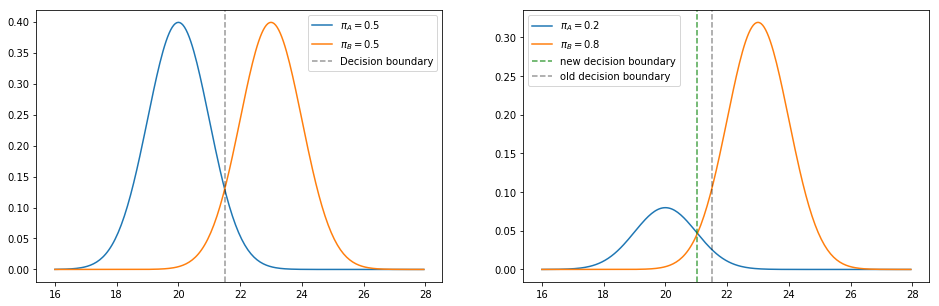

In [4]:
plt.figure(figsize=(16,5))

x_axis_a = np.arange(16, 28, 0.05) 

plt.subplot(1,2,1)
plt.plot(x_axis, sp.stats.norm.pdf(x_axis, 20, 1 ), label = "$\pi_A =0.5$")
plt.plot(x_axis, sp.stats.norm.pdf(x_axis, 23, 1 ), label="$\pi_B =0.5$")
plt.axvline(21.5, linestyle='--', color='k', alpha = 0.4, label="Decision boundary")
plt.legend()

plt.subplot(1,2,2)
plt.plot(x_axis, 0.2 * sp.stats.norm.pdf(x_axis, 20, 1 ), label = "$\pi_A =0.2$")
plt.plot(x_axis, 0.8 * sp.stats.norm.pdf(x_axis, 23, 1 ), label="$\pi_B =0.8$")

plt.axvline(21.038, linestyle='--', color='g', alpha = 0.7, label="new decision boundary")
plt.axvline(21.5, linestyle='--', color='k', alpha = 0.4, label="old decision boundary")
plt.legend()

The first graph on the left is two distributions with same priors ($\pi_A == \pi_B$) the decision bounday stays in the same middle ground of the distributions. The second graph on the right is of two distributions with different priors ($\pi_A < \pi_B$). Adjusting our priors, shifts the decision boundary making class B highly likely compare to class A.

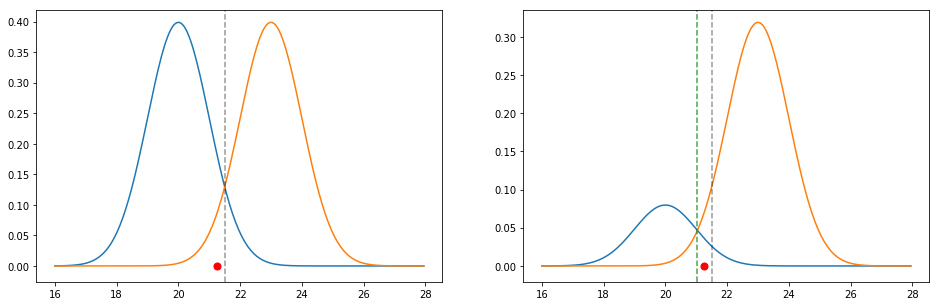

In [5]:
plt.figure(figsize=(16,5))

x_axis_a = np.arange(16, 28, 0.05) 

plt.subplot(1,2,1)
plt.plot(x_axis, sp.stats.norm.pdf(x_axis, 20, 1 ), label = "$\pi =0.5$")
plt.plot(x_axis, sp.stats.norm.pdf(x_axis, 23, 1 ), label="$\pi =0.5$")
plt.axvline(21.5, linestyle='--', color='k', alpha = 0.4)

plt.scatter(21.25, 0, color='r', s=50)

plt.subplot(1,2,2)
plt.plot(x_axis, 0.2 * sp.stats.norm.pdf(x_axis, 20, 1 ), label = "$\pi =0.2$")
plt.plot(x_axis, 0.8 * sp.stats.norm.pdf(x_axis, 23, 1 ), label="$\pi =0.8$")

plt.axvline(21.038, linestyle='--', color='g', alpha = 0.7)
plt.axvline(21.5, linestyle='--', color='k', alpha = 0.4)

plt.scatter(21.25, 0, color='r', s=50)

If we were to classify the red point using the first model with equal priors, the red point would be classified as class A where as using our newly adjusted prior the red point will now be classified as class B.


Now lets look at our credit card problem. In our problem we want to classify if a given entry defaulted or not (two classes `default` and `non-default`). Lets look at the probability distribution for both classes. We will use `Balance` as our dependent variable. 

Text(0.5, 1.0, 'Distribution of Credit Card Balance')

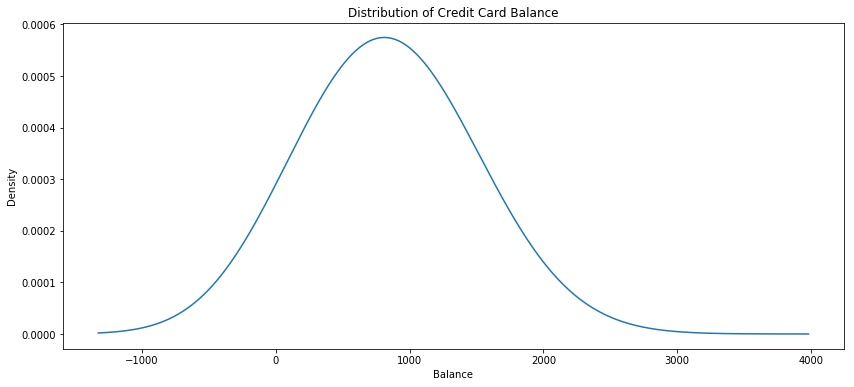

In [6]:
plt.figure(figsize=(14,6))
data["balance"].plot.density(bw_method=1)
plt.xlabel("Balance")
plt.title("Distribution of Credit Card Balance")

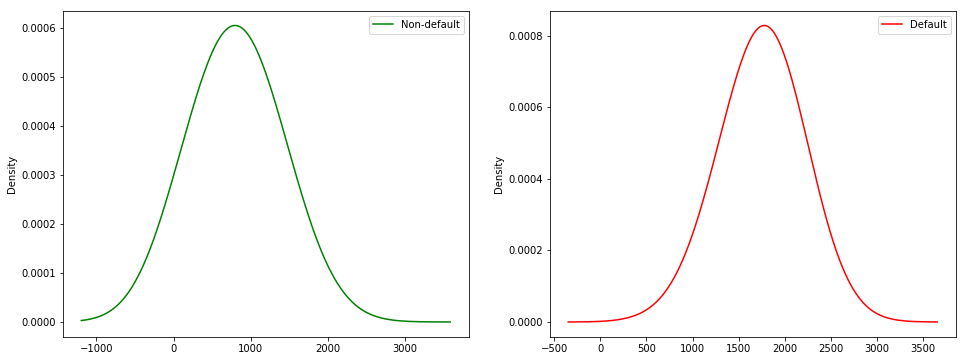

In [7]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
data[data["default"]=="No"]["balance"].plot.density(bw_method=1, label="Non-default",  color='g')
plt.legend()

plt.subplot(1,2,2)
data[data["default"]=="Yes"]["balance"].plot.density(bw_method=1, label="Default", color='r')
plt.legend()

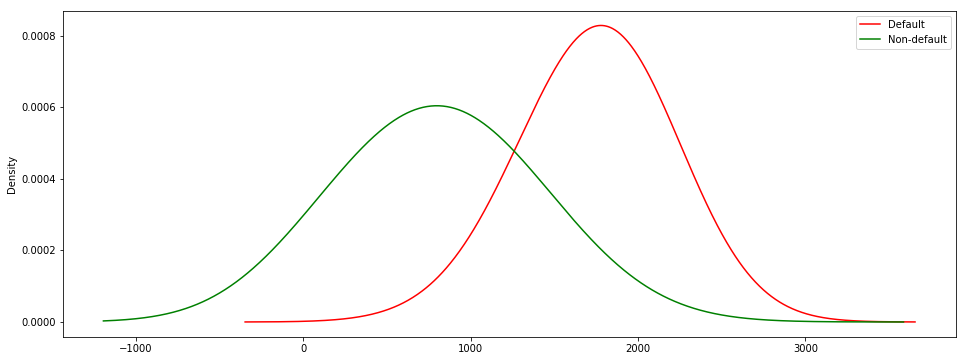

In [8]:
plt.figure(figsize=(16,6))
data[data["default"]=="Yes"]["balance"].plot.density(bw_method=1, label="Default",  color='r')
data[data["default"]=="No"]["balance"].plot.density(bw_method=1, label="Non-default",  color='g')
plt.legend()

### Computing the LDA - Estimating the parameter

We have from Bayes theorem,
$$
p(Y=A~~|~~X) = \frac{\pi_A \cdot p_A(x)}{\sum_{i=1}^{K} \pi_i \cdot p_i(x)}
$$
In above section we discussed about the prior probability $\pi_A$, now we need to find $p_A(x)$. We can compute $p_A(x)$ simply as the `pdf`, $f_A(x)$, of Gaussian

$$
p_A(x) = f_A(x) = \frac{1}{ \sqrt{2\pi\sigma_A}} e^{\frac{-1}{2}(\frac{x-\mu_A}{\sigma_A})^2}
$$

We assume that $\mu_k$ is the just the mean $X$ in class $k$ and $\sigma_k$ be the $\sigma$ across all classes. Then we can write probability of point $X$ being in class $k$ as:

$$
p(Y=k~~|~~X) = \frac{\pi_k\frac{1}{ \sqrt{2\pi\sigma k}} e^{\frac{-1}{2}(\frac{x-\mu_k}{\sigma_k})^2}}{\sum_{i=1}^{K} \pi_i \frac{1}{ \sqrt{2\pi\sigma k}} e^{\frac{-1}{2}(\frac{x-\mu_k}{\sigma_k})^2}}
$$

Taking log on both side and simplifying the above equation leads to the following discriminant score
$$
\delta_k(x) = x \cdot \frac{\mu_k}{\sigma^2}- \frac{\mu_k^2}{2\sigma^2}+log(\pi_k)
$$

Using above discriminant score, for every k classes we can find $\delta_k$ on input $x$ and select a class for which $\delta_k$ is maximal. 

### Inferring the Params with Real Data

For real Data, before we compute the discriminant score ($\delta_k(x)$), we should be able to find $\pi_k$, $\mu_k$ and $\sigma^2$ using following formula.

$$
\pi_k = n_k /n
$$

$$
\mu_k = 1 / n_k \sum_{y_i=k}x_i
$$


$$
\sigma^2 = \sum\frac{n_k-1}{n-K}\cdot \sigma_k
$$

### Working with Multiple Parameters ($~p >  1~$)
In above section, we discussed about the single variable/parameter LDA but we usually have multiple variables/parameters $p>1$. The extrapolation is simple: instead of a univariate Gaussian, we will use a multivariate Gaussian.

$$
f(x) = \frac{1}{(2 \pmb{\pi})^{p/2} |\Sigma|^{1/2}}e^{( \pmb{x}- \pmb{\mu})^T\Sigma^{-1}(x-u)}
$$

Using the multivariate Gaussian we can recompute our discriminant score as follows.

$$
\delta(x) = x^T \Sigma^{-1}\mu_k - \frac{1}{2}\mu_k^T\Sigma^{-1}\mu_k + log(\pi_k)
$$

#### The multivariate with $p=2$ 

From Mixture Models, we have equation for multivariate gaussian distribution
$$
f(x, y) = \frac{1}{2\pi\sigma_X\sigma_Y\sqrt{1-\rho^2}}exp\left(-\frac{1}{2(1-\rho^2)} \left[ \frac{(x-\mu_X)^2}{\sigma_X^2} + \frac{(y-\mu_Y)^2}{\sigma_Y^2} - \frac{2\rho(x-\mu_X)(y-\mu_Y)}{\sigma_X\sigma_Y} \right] \right)
$$

* Covariance Matrix

<img src="http://128.171.10.138:4000/assets/ipynb/week_14/images/multi_var_Example.png" alt="drawing" style="width:500px;"/>

### Computing Class Probabilities from From Discriminant Score

The Discriminant Score is just a measure of probability, to get the class probabilies from the discriminant score we can convert the estimates $\delta_k(x)$ into probabilities using following formula.

$$
p(Y=k~|~X=x) = \frac{e^\delta_k(x)}{\sum_{i=1}^{K}e^{\delta_i(x)}}
$$

### Linear Discriminant Analysis on Credit Card Dataset
Lets use the Linear Discriminant Analysis to classify the wheather the credit card was default or not. First we will fit a `LinearDiscriminantAnalysis` model from scikit learn using the credit card dataset.

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()

clf.fit(data[["balance", "income"]], data["default"])

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

Now we will sample a testing set for the model. We will take 60 samples from `default="Yes"` and 60 samples from `default="No"` dataset.

In [10]:
sample = np.concatenate([data[data["default"] == "Yes"].head(60).index , data[data["default"] == "No"].head(60).index])
sample

array([ 136,  173,  201,  206,  209,  241,  243,  263,  341,  345,  349,
        357,  406,  439,  440,  487,  540,  545,  576,  581,  641,  651,
        713,  740,  761,  803,  833,  867,  920,  932,  974,  981,  999,
       1018, 1023, 1043, 1098, 1136, 1142, 1143, 1160, 1209, 1215, 1255,
       1359, 1361, 1395, 1445, 1447, 1484, 1487, 1496, 1502, 1548, 1590,
       1609, 1625, 1647, 1702, 1709,    0,    1,    2,    3,    4,    5,
          6,    7,    8,    9,   10,   11,   12,   13,   14,   15,   16,
         17,   18,   19,   20,   21,   22,   23,   24,   25,   26,   27,
         28,   29,   30,   31,   32,   33,   34,   35,   36,   37,   38,
         39,   40,   41,   42,   43,   44,   45,   46,   47,   48,   49,
         50,   51,   52,   53,   54,   55,   56,   57,   58,   59])

Lets use our model to predict the `default` parameter for training dataset and plot the data points on a scatter plot.

In [11]:
y_pred  = clf.predict(data[["balance", "income"]])
y_pred[sample]

array(['No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No'], dtype='<U3')

In [12]:
y_sample_status = np.where(y_pred[sample]=="Yes", 1, 0)
y_sample_status

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Text(0, 0.5, 'Balance')

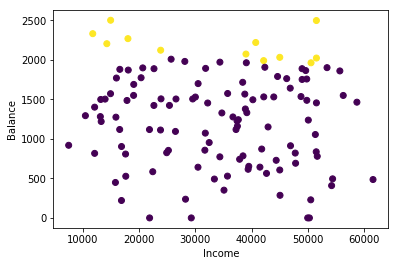

In [13]:
plt.scatter(data.iloc[sample]["income"], data.iloc[sample]["balance"], c=y_sample_status)
plt.xlabel("Income")
plt.ylabel("Balance")

In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix(data["default"], y_pred)


array([[9647,   20],
       [ 256,   77]])

In [15]:
tn, fp, fn, tp = confusion_matrix(data["default"], y_pred).ravel()

print(tn, fp, fn, tp)

9647 20 256 77


### The Confusion Matrix

Consider an example of classifying cancer or not cancer, cancer patient are rare so if we classify every patient as not cancer, our model still has more accuracy (less error). But classifying all patient as not cancer doesn't address our problem of classification. So Accuracy of an model can be confusing when measuring the performance of a model. And we need more resilent method to measure performance of our models. The confusion matrix helps to address the issue.

A Confusion Matrix (table) can be used to measure the performance of an machine learning algorithm, usually a supervised learning one. Each row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class. The name confusion matrix reflects the fact that it makes it easy for us to see what kind of confusions occur in our classification algorithms. For example the algorithms should have predicted a sample as $c_i$ because the actual class is $c_i$, but the algorithm came out with $c_j$. In this case of mislabelling the element $cm[i,j]$ will be incremented by one, when the confusion matrix is constructed.

The confusion matrix conveniently display the results of the prediction contrasted against the real data. Lets look back at our credit card dataset and lets use the results from our LDA classifier to construct a confusion matrix for the model.
    <img src="http://128.171.10.138:4000/assets/ipynb/week_14/images/Confusion_mat.png" alt="drawing" style="width:500px;"/>


We can find the misclassification rate for our credit card dataset as
$$Misclassification~~rate = \frac{20+256}{10000} = 2.76%$$

Now lets say, if we were to classify everything as `No`, error would be $$Error = 333/10000 = 3.33%$$
Note that even with classifying everything as `No` gives us low error.

Now lets see, how many of `non default` transcation were classified as `default` by our LDA model. This is called the False Positive Rate. $$Errors~with~No~ = False~Positive~Rate = 20/9667 = 0.2\%$$

How about `default` transaction being classified as `no default` by our model? This is called the False negative rate. $$Errors~with~Yes = False~Negative~Rate = 256/333 = 76.8\%$$

Our model is classifying more `default` for `no default` transaction. The results are the opposite of what a credit company would use as a strategy i.e. Rather misclassify those who don't default than those who do. Better to err on the side of caution and level more.

So we want our model to have low False Negative Rate and low False Positive Rate but how can we acquire those low rates? This can be changed by adapting the default cutoff for classification. By default, we have cutoff of 0.5. If probability is greater than 0.5, we classify the transaction as default. i.e. $$p(Default = Yes|Balance, income) \ge 0.5$$ 

Instead of using default cutoff of $0.5$, we can set cutoff to a value say $t$. $$p(Default = Yes|Balance, income) \ge t, such~that~t \in [0,1]$$

##### Lets try to find the proper cutoff value for our model, lets find the rates for t=0.2

In [16]:
y_pred_proba  = clf.predict_proba(data[["balance", "income"]])
y_pred_proba

array([[9.96771410e-01, 3.22858953e-03],
       [9.97126669e-01, 2.87333055e-03],
       [9.87014731e-01, 1.29852692e-02],
       ...,
       [9.93023009e-01, 6.97699081e-03],
       [8.73940133e-01, 1.26059867e-01],
       [9.99825029e-01, 1.74971323e-04]])

In [17]:
y_pred_proba_0p2 = y_pred_proba[:,1] > 0.2
y_pred_0p2 = np.where(y_pred_proba_0p2, "Yes", "No")
y_pred_0p2

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U3')

In [18]:
tn, fp, fn, tp = confusion_matrix(data["default"], y_pred_0p2).ravel()
print(tn, fp, fn, tp)
print("False Positive Rate = ", (fp/(fp + tn)))
print("False Negative Rate = ", (fn/(fn + tp)))

9427 240 144 189
False Positive Rate =  0.02482673011275473
False Negative Rate =  0.43243243243243246


#### Lets try again for t=0.1

In [19]:
y_pred_proba_0p2 = y_pred_proba[:,1] > 0.1
y_pred_0p2 = np.where(y_pred_proba_0p2, "Yes", "No")
tn, fp, fn, tp = confusion_matrix(data["default"], y_pred_0p2).ravel()
print(tn, fp, fn, tp)
print("False Positive Rate = ", (fp/(fp + tn)))
print("False Negative Rate = ", (fn/(fn + tp)))

9094 573 89 244
False Positive Rate =  0.05927381814420193
False Negative Rate =  0.2672672672672673


We can see as we decrease $t$, results in vast improvements with the False Negative Rate
    <img src="http://128.171.10.138:4000/assets/ipynb/week_14/images/confusion_matrix_2.png" alt="drawing" style="width:500px;"/>

##### Which threshold value is best? 
Now we can keep on changing the value for $t$ and find rates. But what would be the best value of threshold($t$)? The answer is it depends. Based on domain knowledge or business objective, we need information about the costs associated with default.
<img src="http://128.171.10.138:4000/assets/ipynb/week_14/images/varying_threshold.png" alt="drawing" style="width:700px;"/> 

### Definition of the Terms:
```Positive (P) : Observation is positive (for example: is an apple).
Negative (N) : Observation is not positive (for example: is not an apple).
True Positive (TP) : Observation is positive, and is predicted to be positive.
False Negative (FN) : Observation is positive, but is predicted negative.
True Negative (TN) : Observation is negative, and is predicted to be negative.
False Positive (FP) : Observation is negative, but is predicted positive.```

### Advantages of LDA
The Logistic regression model params can be highly unstable when model is well separated whereas Linear discriminant handles separation very well. Another advantage of LDA is that handles smaller data relatively well. LDA also preforms better with multinomial data.

### Inconvenients of LDA
The disadvantage of LDA is that it doesn't handle categorical variables well. Also LDA does not scale well with a large number of predictors.